In [1]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
def populate_hist_vals(m0h, hmdr, left_ratio, right_ratio, rad_ratio):
  hmd2 = random.uniform(low = 1., high = 50.)
  hmd1 = left_ratio * hmd2
  h = right_ratio * hmd2
  m0 = m0h/h
  radwidth2 = hmd2/hmdr
  rad0_rad1 = radwidth2 * (1/rad_ratio - 1)

  radwidth0, radwidth1, hmd0 = 0, 0, 0
  while radwidth0 <= 0 or hmd0 >= h:
    radwidth1 = hmd1/random.uniform(low = max(hmd1/rad0_rad1, 1), high = 20)
    radwidth0 = rad0_rad1 - radwidth1
    hmd0 = random.uniform(low = max(1, h/radwidth0), high = 20) * radwidth0

  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  for i in range(3):
    assert radwidths[i] > 0
    assert d[i] > 0
  return h, d, a, m0

def solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 2):
  prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
  mk = prob.m_k
  info = {"h" : h,
          "d" : d,
          "a" : a,
          "region" : region,
          "m0s" : [m0]}
  print(info)
  return merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))

def variable_values(cf):
  return {"m0h" : cf["m0s"][0] * cf["h"],
          "(h-d2)/radwidth2" : (cf["h"]-cf["d"][2])/(cf["a"][2] - cf["a"][1]),
          "(h-d1)/(h-d2)" : (cf["h"]-cf["d"][1])/(cf["h"]-cf["d"][2]),
          "(h)/(h-d2)" : cf["h"]/(cf["h"]-cf["d"][2]),
          "radwidth2/a2" : (cf["a"][2] - cf["a"][1])/cf["a"][2]}

def print_formatted_variables(cf):
  out_str = ""
  vals = variable_values(cf)
  for key in vals.keys():
    out_str = out_str + key + f" {vals[key]:.3g}"
  print(out_str)

def convergence_range(data, hydro, error):
  convergence_points = [cf[m0][f"convergence point {error:.2g} " + hydro] for cf in data for m0 in cf["m0s"]]
  return (min(convergence_points), max(convergence_points))

In [ ]:
file1 = "data/histogram-3.pkl"
m0hs = [10, 40]
hmdrs = [20, 30]
left_ratios = [0.9, 1.1]
right_ratios = [1.5, 3]
rad_ratios = [0.1, 0.3]

rho, big_nmk, nmk_max = 1023, 200, 150
heaving, NMK = [0, 0, 1], [big_nmk] * 4

# all_prob_sets = []

# for m0h in m0hs:
#   for hmdr in hmdrs:
#     for left_ratio in left_ratios:
#       for right_ratio in right_ratios:
#         for rad_ratio in rad_ratios:
#           prob_set = []
#           for i in range(50):
#             h, d, a, m0 = populate_hist_vals(m0h, hmdr, left_ratio, right_ratio, rad_ratio)
#             prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 2))
#           all_prob_sets.append(prob_set)
#           update_data_file(all_prob_sets, file1)
#           print("Finished a set.")

{'h': 60.003351346504786, 'd': [19.02568312785369, 24.00134053860191, 20.001117115501593], 'a': [1.890157734821205, 18.00100540395144, 20.0011171155016], 'region': 2, 'm0s': [0.16665735789076894]}
{'h': 65.93771701398603, 'd': [18.636700010898863, 26.375086805594414, 21.979239004662013], 'a': [2.2053183361311923, 19.78131510419581, 21.97923900466201], 'region': 2, 'm0s': [0.15165826863370024]}
{'h': 68.96768819057321, 'd': [21.872949793536094, 27.587075276229285, 22.989229396857738], 'a': [2.2719338763572274, 20.690306457171964, 22.989229396857738], 'region': 2, 'm0s': [0.1449954357229976]}
{'h': 6.083915496241587, 'd': [1.2283588848457256, 2.4335661984966346, 2.027971832080529], 'a': [0.12239420852771299, 1.825174648872476, 2.027971832080529], 'region': 2, 'm0s': [1.6436783196902756]}
{'h': 37.20837451256584, 'd': [10.32639071524451, 14.883349805026334, 12.402791504188613], 'a': [0.7566759903530809, 11.16251235376975, 12.402791504188611], 'region': 2, 'm0s': [0.26875670144157593]}
{'h

In [4]:
hist_prob_sets = open_pkl_file(file1)
for subset in hist_prob_sets:
  generate_convergence_data(subset, [0.01, 0.005])
  generate_log_data(subset)

In [8]:
for subset in hist_prob_sets:
  print_formatted_variables(subset[0])
  print("am", convergence_range(subset, "am", 0.01))
  print("dp", convergence_range(subset, "dp", 0.01))

# print("Added Mass Histograms")
# for subset in hist_prob_sets:
#   print_formatted_variables(subset[0])
#   histogram(subset, "am", 0.01)

# print("Damping Histograms")
# for subset in hist_prob_sets:
#   print_formatted_variables(subset[0])
#   histogram(subset, "dp", 0.01)

m0h 10(h-d2)/radwidth2 20(h-d1)/(h-d2) 0.9(h)/(h-d2) 1.5radwidth2/a2 0.1
am (51, 51)
dp (56, 56)
m0h 10(h-d2)/radwidth2 20(h-d1)/(h-d2) 0.9(h)/(h-d2) 1.5radwidth2/a2 0.3
am (60, 60)
dp (54, 54)
m0h 10(h-d2)/radwidth2 20(h-d1)/(h-d2) 0.9(h)/(h-d2) 3radwidth2/a2 0.1
am (55, 55)
dp (39, 39)
m0h 10(h-d2)/radwidth2 20(h-d1)/(h-d2) 0.9(h)/(h-d2) 3radwidth2/a2 0.3
am (65, 65)
dp (36, 36)
m0h 10(h-d2)/radwidth2 20(h-d1)/(h-d2) 1.1(h)/(h-d2) 1.5radwidth2/a2 0.1
am (71, 71)
dp (56, 56)
m0h 10(h-d2)/radwidth2 20(h-d1)/(h-d2) 1.1(h)/(h-d2) 1.5radwidth2/a2 0.3
am (76, 76)
dp (54, 54)
m0h 10(h-d2)/radwidth2 20(h-d1)/(h-d2) 1.1(h)/(h-d2) 3radwidth2/a2 0.1
am (68, 68)
dp (37, 37)
m0h 10(h-d2)/radwidth2 20(h-d1)/(h-d2) 1.1(h)/(h-d2) 3radwidth2/a2 0.3
am (71, 71)
dp (36, 36)
m0h 10(h-d2)/radwidth2 30(h-d1)/(h-d2) 0.9(h)/(h-d2) 1.5radwidth2/a2 0.1
am (77, 77)
dp (63, 63)
m0h 10(h-d2)/radwidth2 30(h-d1)/(h-d2) 0.9(h)/(h-d2) 1.5radwidth2/a2 0.3
am (90, 90)
dp (59, 60)
m0h 10(h-d2)/radwidth2 30(h-d1)/(h-d2)

In [9]:
def print_lst(title, lst):
  print(title)
  for entry in lst:
    if type(entry) is float:
      print(f"{entry:.3g}")
    else: print(entry)

variable_lsts = {key : [] for key in variable_values(hist_prob_sets[0][0]).keys()}
am_min_lst, am_max_lst, dp_min_lst, dp_max_lst = [], [], [], []
for subset in hist_prob_sets:
  am_min, am_max = convergence_range(subset, "am", 0.01)
  dp_min, dp_max = convergence_range(subset, "dp", 0.01)
  am_min_lst.append(am_min)
  am_max_lst.append(am_max)
  dp_min_lst.append(dp_min)
  dp_max_lst.append(dp_max)
  var_vals = variable_values(subset[0])
  for key in var_vals.keys():
    variable_lsts[key].append(var_vals[key])

for key in variable_lsts.keys():
  print_lst(key, variable_lsts[key])

print_lst("am min", am_min_lst)
print_lst("am max", am_max_lst)
print_lst("dp min", dp_min_lst)
print_lst("dp max", dp_max_lst)

m0h
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
(h-d2)/radwidth2
20
20
20
20
20
20
20
20
30
30
30
30
30
30
30
30
20
20
20
20
20
20
20
20
30
30
30
30
30
30
30
30
(h-d1)/(h-d2)
0.9
0.9
0.9
0.9
1.1
1.1
1.1
1.1
0.9
0.9
0.9
0.9
1.1
1.1
1.1
1.1
0.9
0.9
0.9
0.9
1.1
1.1
1.1
1.1
0.9
0.9
0.9
0.9
1.1
1.1
1.1
1.1
(h)/(h-d2)
1.5
1.5
3
3
1.5
1.5
3
3
1.5
1.5
3
3
1.5
1.5
3
3
1.5
1.5
3
3
1.5
1.5
3
3
1.5
1.5
3
3
1.5
1.5
3
3
radwidth2/a2
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
0.1
0.3
am min
51
60
55
65
71
76
68
71
77
90
70
77
103
109
85
89
50
59
55
65
70
75
68
70
76
90
70
77
101
108
84
89
am max
51
60
55
65
71
76
68
71
77
90
70
77
103
109
85
89
50
59
55
65
70
75
68
71
76
90
70
77
101
108
84
89
dp min
56
54
39
36
56
54
37
36
63
59
45
41
62
60
43
41
134
134
80
79
134
134
80
79
135
135
84
83
136
135
84
83
dp max
56
54
39
36
56
54
37
36
63
60
45
41
62
60
43
41
134
134
80
79
134

In [ ]:
file2 = "data/predetermined-1.pkl"
all_data = open_pkl_file(file2)
all_data["(h-d2)/radwidth2"] = all_data.pop("(h-d)/radwidth")
all_data["(h-d1)/(h-d2)"] = all_data.pop("left ratio")
all_data["h/(h-d2)"] = all_data.pop("right ratio")
all_data["radwidth2/a2"] = all_data.pop("rad ratio")
for key in all_data.keys():
  generate_convergence_data(all_data[key], [0.01, 0.005])
  generate_log_data(all_data[key])

In [21]:
def h_minus_d_over_radwidth(data_dict):
    region = data_dict["region"]
    radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
    return (data_dict["h"] - data_dict["d"][region])/radwidth

def right_ratio(data_dict):
  region = data_dict["region"]
  if region == (len(data_dict["d"]) - 1):
     return data_dict["h"]/(data_dict["h"] - data_dict["d"][region])
  else:
    return (data_dict["h"] - data_dict["d"][region + 1])/(data_dict["h"] - data_dict["d"][region])
    
def left_ratio(data_dict):
  region = data_dict["region"]
  if region == 0:
     return 0
  else:
    return (data_dict["h"] - data_dict["d"][region - 1])/(data_dict["h"] - data_dict["d"][region])
  
def rad_ratio(data_dict):
  region = data_dict["region"]
  radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
  return radwidth/data_dict["a"][region]

def m0h(data_dict):
  return data_dict["h"] * data_dict["m0s"][0]

variable_funcs = {"(h-d1)/(h-d2)" : wrap_m0(left_ratio),
                  "h/(h-d2)" : wrap_m0(right_ratio),
                  "(h-d2)/radwidth2" : wrap_m0(h_minus_d_over_radwidth),
                  "radwidth2/a2" : wrap_m0(rad_ratio),
                  "m0h" : wrap_m0(m0h)}

In [22]:
key = list(all_data.keys())[0]
print(all_data.keys())

dict_keys(['m0h', '(h-d2)/radwidth2', '(h-d1)/(h-d2)', 'h/(h-d2)', 'radwidth2/a2'])


In [27]:
prototypes = {"m0h" : subdivide_by_constants(all_data["m0h"], "m0h", variable_funcs)[2],
              "(h-d2)/radwidth2" : subdivide_by_constants(all_data["(h-d2)/radwidth2"], "(h-d2)/radwidth2", variable_funcs)[2],
              "(h-d1)/(h-d2)" : subdivide_by_constants(all_data["(h-d1)/(h-d2)"], "(h-d1)/(h-d2)", variable_funcs)[1],
              "h/(h-d2)" :subdivide_by_constants(all_data["h/(h-d2)"], "h/(h-d2)", variable_funcs)[0],
              "radwidth2/a2" : subdivide_by_constants(all_data["radwidth2/a2"], "radwidth2/a2", variable_funcs)[5]}

m0h


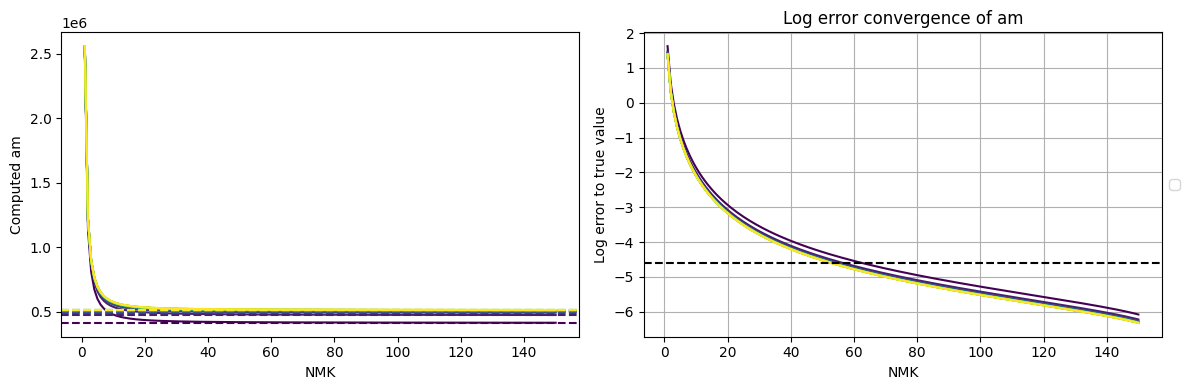

(h-d2)/radwidth2


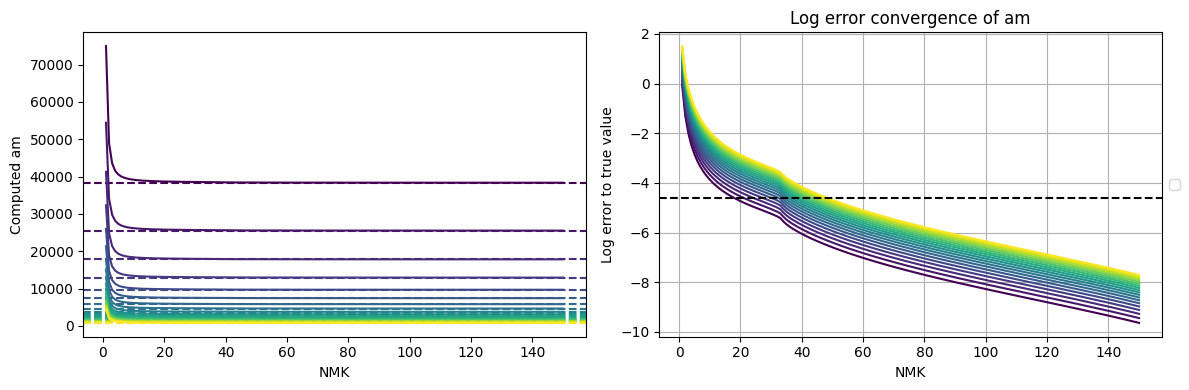

(h-d1)/(h-d2)


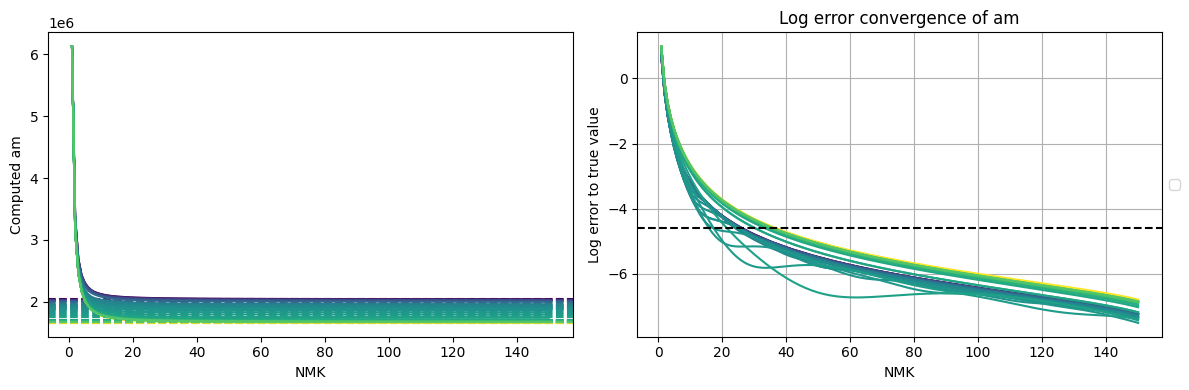

h/(h-d2)


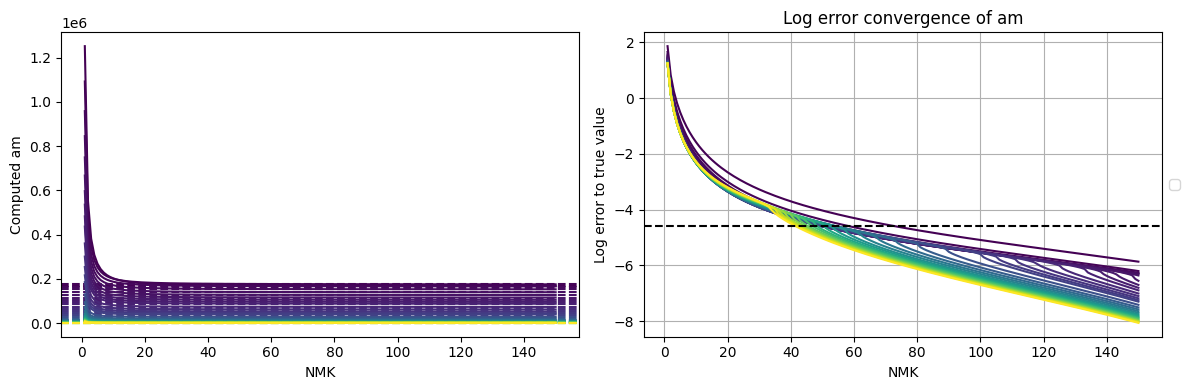

radwidth2/a2


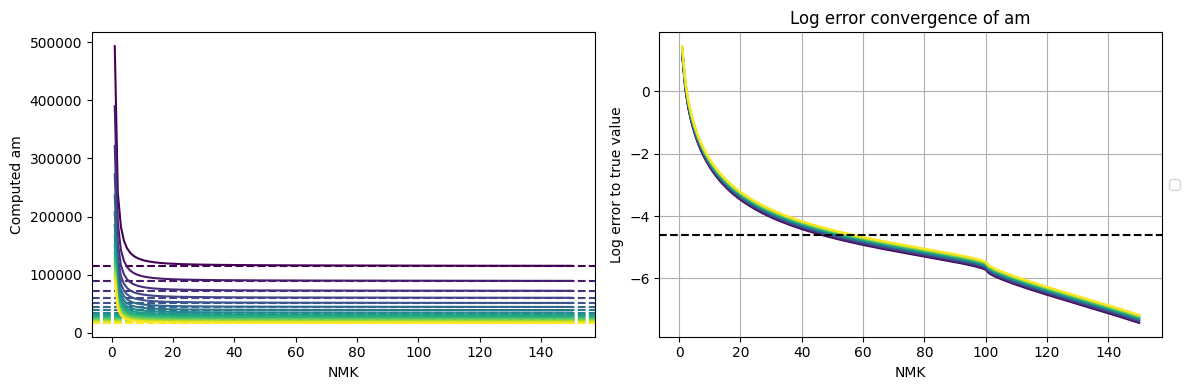

In [30]:
for key in prototypes.keys():
  data = many_data_dicts_to_convergence_plot_data(prototypes[key])
  print(key)
  plot_set_convergence_and_log(data, "am", colors = color_by_f_value(variable_funcs[key], prototypes[key]), show_error = True)

m0h


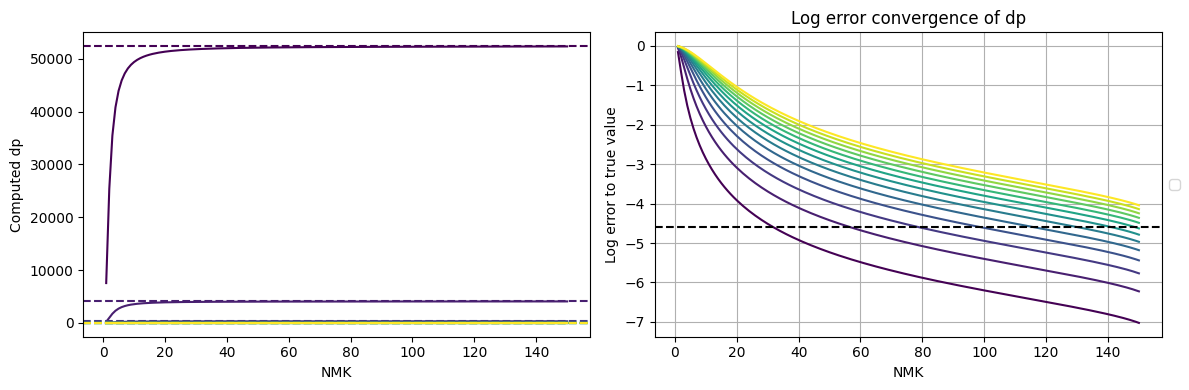

(h-d2)/radwidth2


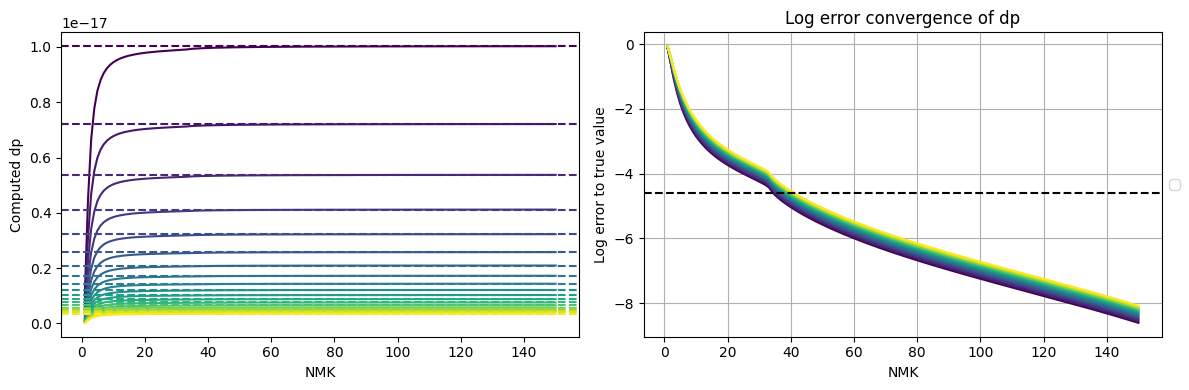

(h-d1)/(h-d2)


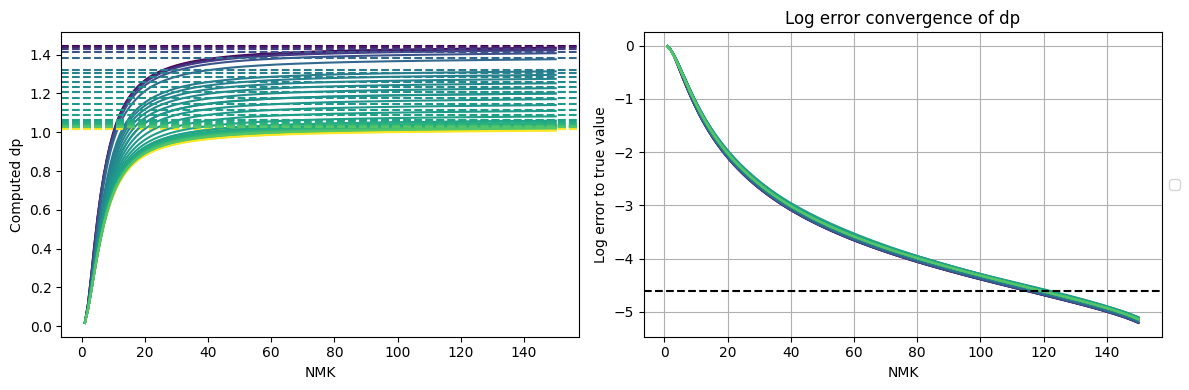

h/(h-d2)


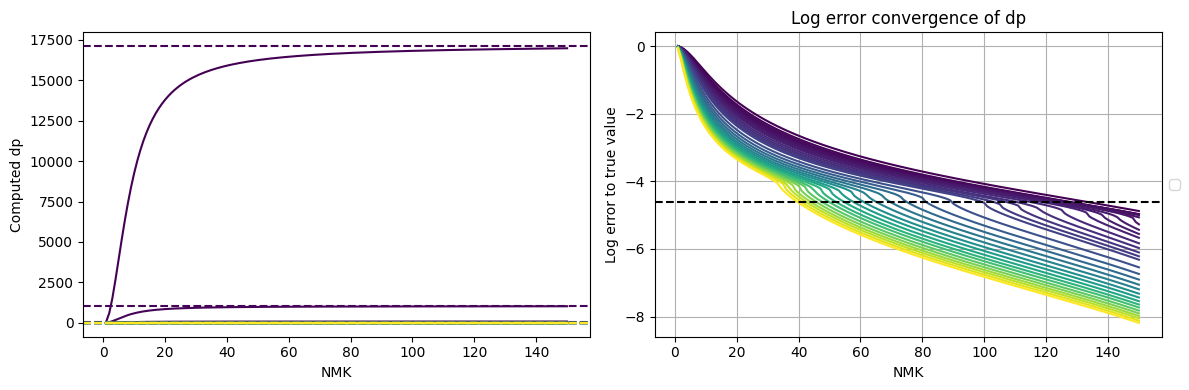

radwidth2/a2


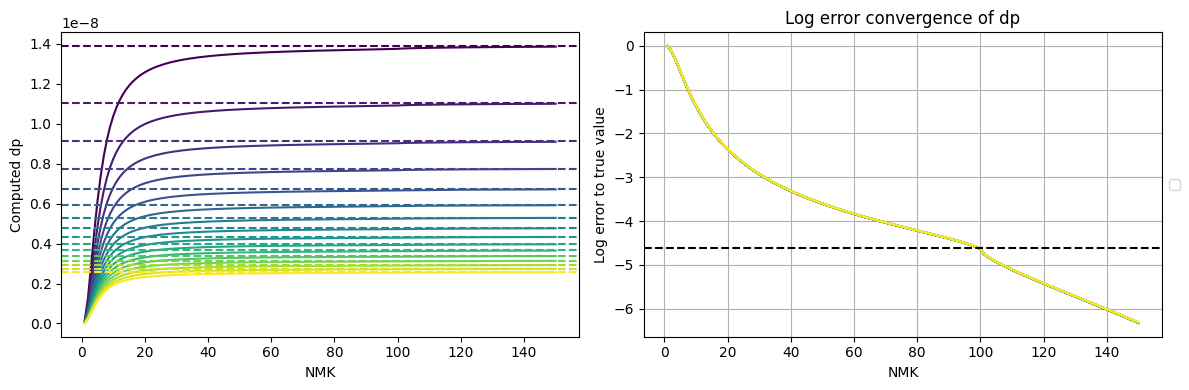

In [31]:
for key in prototypes.keys():
  data = many_data_dicts_to_convergence_plot_data(prototypes[key])
  print(key)
  plot_set_convergence_and_log(data, "dp", colors = color_by_f_value(variable_funcs[key], prototypes[key]), show_error = True)

m0h
Best-fit parameters: [1.44373127 1.32703381]
Best-fit parameters: [1.4090881  2.12886305]
Best-fit parameters: [1.37560215 2.72842569]
Best-fit parameters: [1.34337246 3.22350838]
Best-fit parameters: [1.31268651 3.64768119]
Best-fit parameters: [1.28350955 4.01937595]
Best-fit parameters: [1.25573094 4.3502611 ]
Best-fit parameters: [1.22923493 4.64827616]
Best-fit parameters: [1.20391626 4.91911214]
Best-fit parameters: [1.17968227 5.16701581]
Best-fit parameters: [1.15645182 5.39525801]
Best-fit parameters: [1.1341536  5.60642282]
Best-fit parameters: [1.11272461 5.80259453]


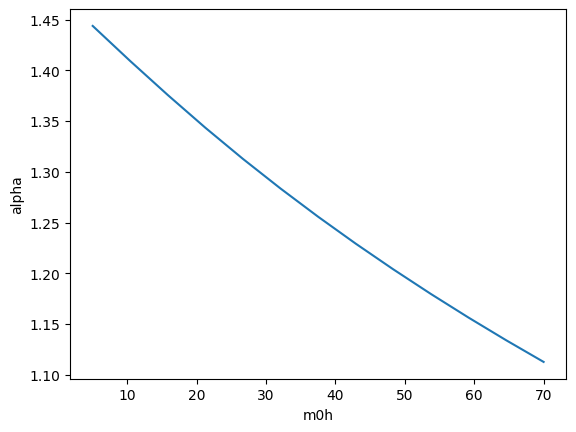

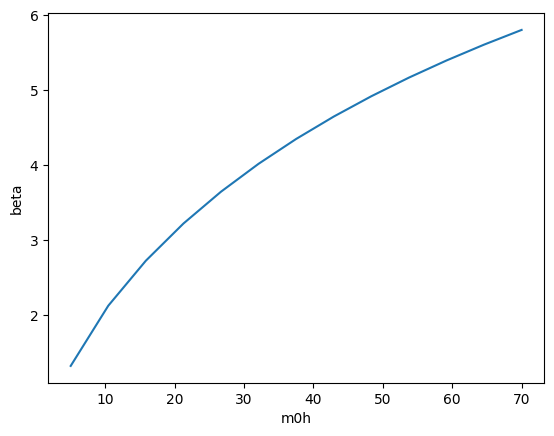

(h-d2)/radwidth2
Best-fit parameters: [1.96661331 2.55344248]
Best-fit parameters: [1.96487431 2.60537018]
Best-fit parameters: [1.96299685 2.65278134]
Best-fit parameters: [1.96100794 2.69641101]
Best-fit parameters: [1.95892796 2.73681441]
Best-fit parameters: [1.95677272 2.77442408]
Best-fit parameters: [1.95455473 2.80958532]
Best-fit parameters: [1.95228403 2.84257894]
Best-fit parameters: [1.94996881 2.87363734]
Best-fit parameters: [1.94761583 2.90295517]
Best-fit parameters: [1.94523069 2.93069749]
Best-fit parameters: [1.94281809 2.95700575]
Best-fit parameters: [1.94038196 2.982002  ]
Best-fit parameters: [1.93792565 3.00579254]
Best-fit parameters: [1.935452   3.02847054]
Best-fit parameters: [1.9329634  3.05011809]
Best-fit parameters: [1.93046193 3.07080808]
Best-fit parameters: [1.92794936 3.09060541]
Best-fit parameters: [1.92542714 3.10956797]


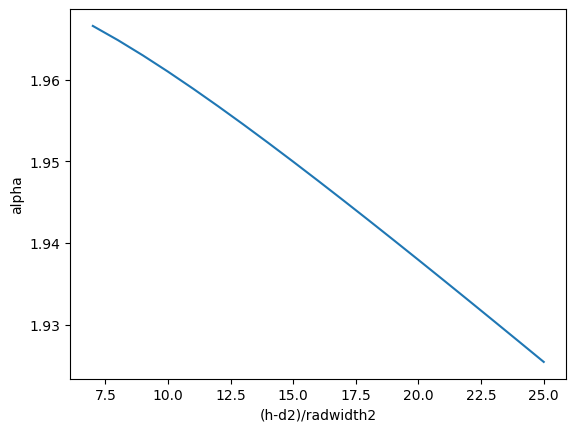

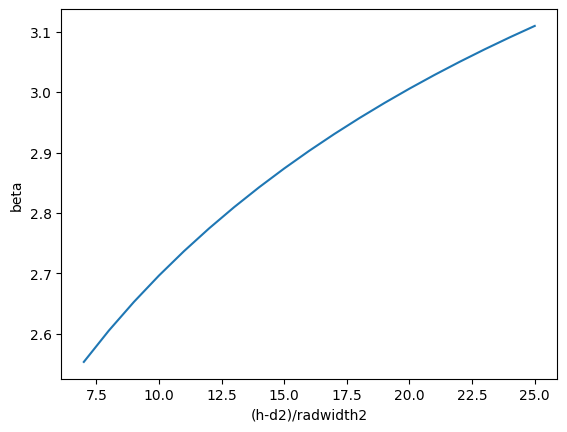

(h-d1)/(h-d2)
Best-fit parameters: [1.3013738  3.44418071]
Best-fit parameters: [1.30145434 3.44801101]
Best-fit parameters: [1.30158508 3.45549138]
Best-fit parameters: [1.3017633  3.47061248]
Best-fit parameters: [1.30186579 3.50155107]
Best-fit parameters: [1.30130213 3.56156363]
Best-fit parameters: [1.3010361  3.57824281]
Best-fit parameters: [1.30062847 3.59605793]
Best-fit parameters: [1.30003993 3.61455933]
Best-fit parameters: [1.29931768 3.63350499]
Best-fit parameters: [1.29865688 3.6530615 ]
Best-fit parameters: [1.29865688 3.6530615 ]
Best-fit parameters: [1.29776374 3.67045682]
Best-fit parameters: [1.2964918  3.68306338]
Best-fit parameters: [1.29496236 3.68868271]
Best-fit parameters: [1.29312341 3.67948976]
Best-fit parameters: [1.2934007  3.62039521]
Best-fit parameters: [1.2934007  3.62039521]
Best-fit parameters: [1.29508049 3.61141058]
Best-fit parameters: [1.29569112 3.60871125]
Best-fit parameters: [1.29636755 3.60881298]
Best-fit parameters: [1.29704332 3.609945

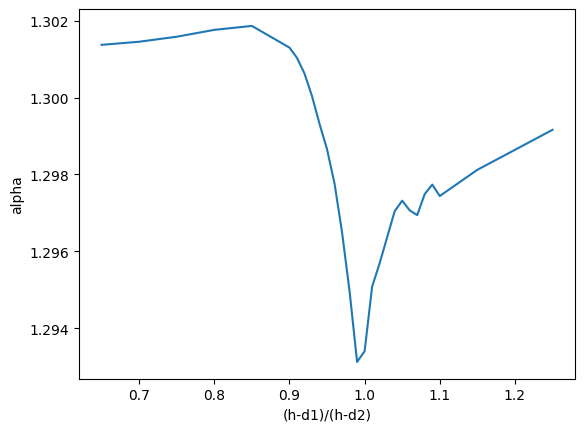

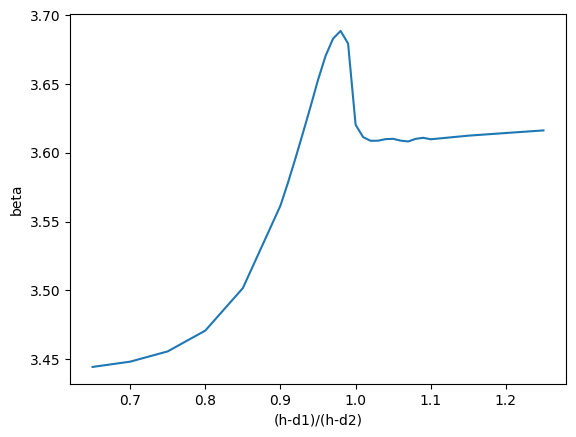

h/(h-d2)
Best-fit parameters: [1.31224715 4.60603669]
Best-fit parameters: [1.32233475 4.39858438]
Best-fit parameters: [1.31198901 4.21268111]
Best-fit parameters: [1.30542104 4.07414696]
Best-fit parameters: [1.29912922 3.94855865]
Best-fit parameters: [1.30036218 3.86344498]
Best-fit parameters: [1.29889134 3.77881335]
Best-fit parameters: [1.31374542 3.76955033]
Best-fit parameters: [1.32665173 3.75937632]
Best-fit parameters: [1.34409299 3.77258905]
Best-fit parameters: [1.37516501 3.78003769]
Best-fit parameters: [1.40966419 3.80122394]
Best-fit parameters: [1.44112902 3.82087246]
Best-fit parameters: [1.47229153 3.83404891]
Best-fit parameters: [1.49935231 3.83572391]
Best-fit parameters: [1.5624859  3.82743788]
Best-fit parameters: [1.61745006 3.8028938 ]
Best-fit parameters: [1.66199052 3.75219963]
Best-fit parameters: [1.70148595 3.69850493]
Best-fit parameters: [1.73581677 3.63865798]
Best-fit parameters: [1.76828204 3.58584308]
Best-fit parameters: [1.79338094 3.51730972]
B

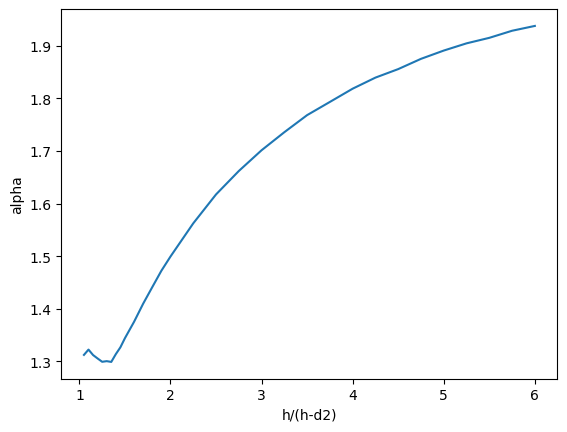

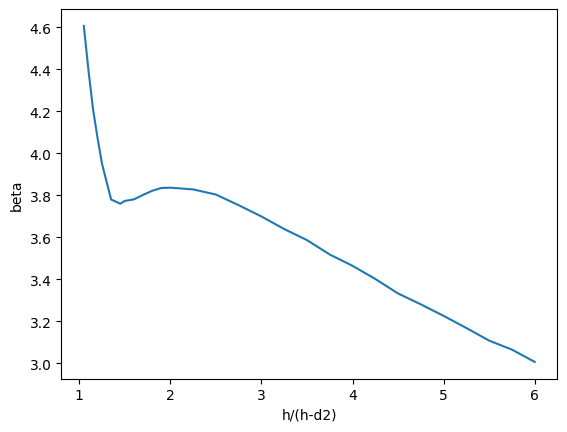

radwidth2/a2
Best-fit parameters: [1.49929044 3.83173871]
Best-fit parameters: [1.49929807 3.83218513]
Best-fit parameters: [1.49930713 3.83272556]
Best-fit parameters: [1.49931732 3.83335397]
Best-fit parameters: [1.4993284  3.83406565]
Best-fit parameters: [1.49934012 3.8348567 ]
Best-fit parameters: [1.49935231 3.83572391]
Best-fit parameters: [1.4993648  3.83666472]
Best-fit parameters: [1.49937747 3.837677  ]
Best-fit parameters: [1.49939015 3.83875858]
Best-fit parameters: [1.49940271 3.83990761]
Best-fit parameters: [1.49941501 3.84112247]
Best-fit parameters: [1.49942695 3.84240191]
Best-fit parameters: [1.49943845 3.84374488]
Best-fit parameters: [1.49944942 3.84515038]
Best-fit parameters: [1.49945979 3.8466176 ]


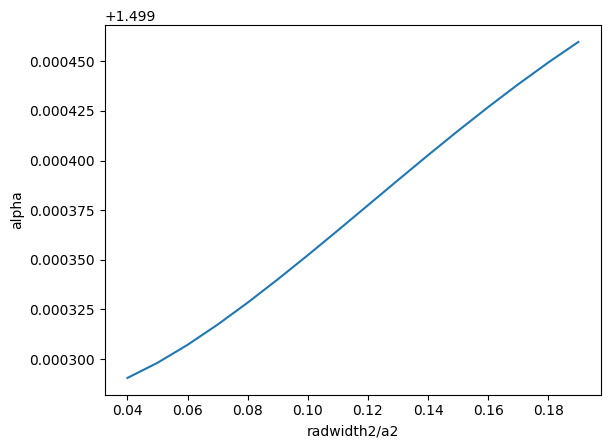

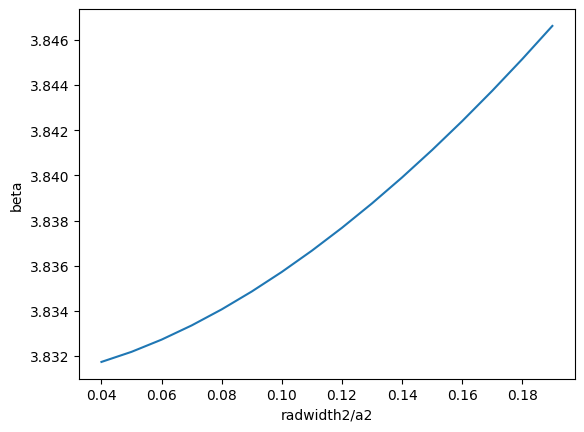

In [35]:
def f(x, a1, a2):
  return - a1 * np.log(x/a2)

for key in prototypes.keys():
  print(key)
  data = prototypes[key]
  data = sorted(data, key=lambda cf: variable_funcs[key](cf, cf["m0s"][0]))
  meta_xs, meta_ys1, meta_ys2 = [], [], []
  for cf in data:
      xs = list(range(1, 151))
      ys = [cf[cf["m0s"][0]]["log errors dp"][i] for i in range(150)]
      # xs, ys = filter_smooth(xs, ys)
      popt, pcov = curve_fit(f, xs, ys, p0=(1, 1))
      print("Best-fit parameters:", popt)
      meta_xs.append(variable_funcs[key](cf, cf["m0s"][0]))
      meta_ys1.append(popt[0])
      meta_ys2.append(popt[1])
      # ys_calc = [f(x, *popt) for x in xs]
      # plt.scatter(xs, ys, label="Data")
      # plt.plot(xs, ys_calc, color="red", label="Fit")
      # plt.legend()
      # plt.show()

  plt.plot(meta_xs, meta_ys1)
  # popt, pcov = curve_fit(meta_f1, meta_xs, meta_ys1, p0=(1, 2, 3))
  # print("Best-fit parameters:", popt)
  # plt.plot(meta_xs, [meta_f1(x, *popt) for x in meta_xs])
  plt.xlabel(key)
  plt.ylabel("alpha")
  plt.show()

  plt.plot(meta_xs, meta_ys2)
  # popt, pcov = curve_fit(meta_f2, meta_xs, meta_ys2, p0=(1, 2, 3))
  # print("Best-fit parameters:", popt)
  # plt.plot(meta_xs, [meta_f1(x, *popt) for x in meta_xs])
  plt.xlabel(key)
  plt.ylabel("beta")
  plt.show()

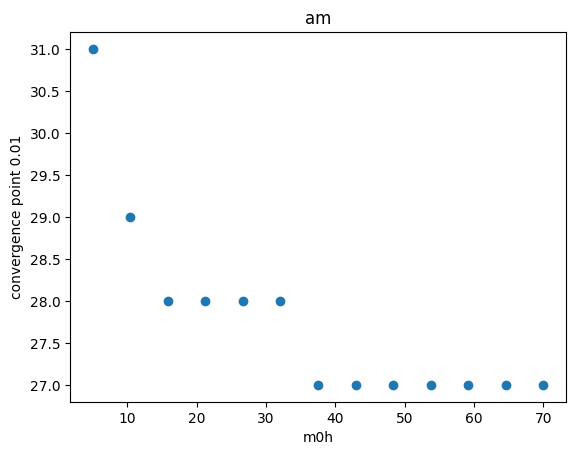

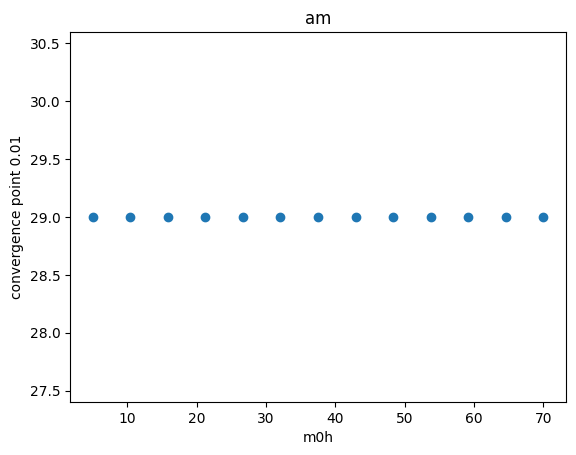

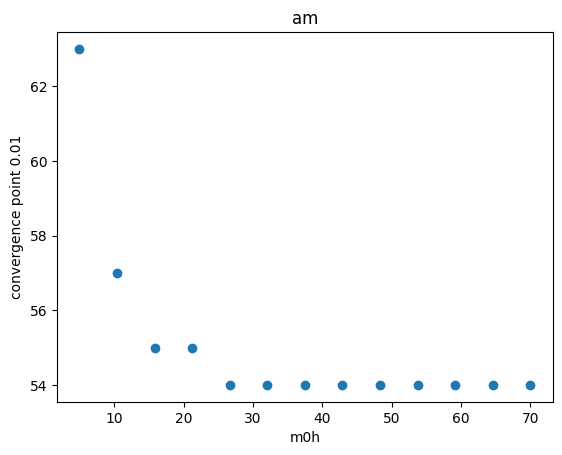

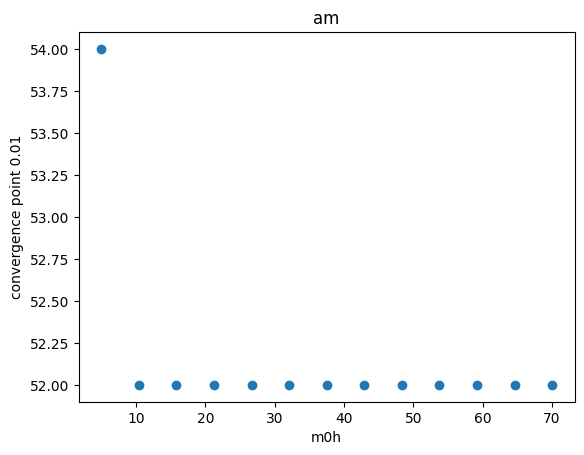

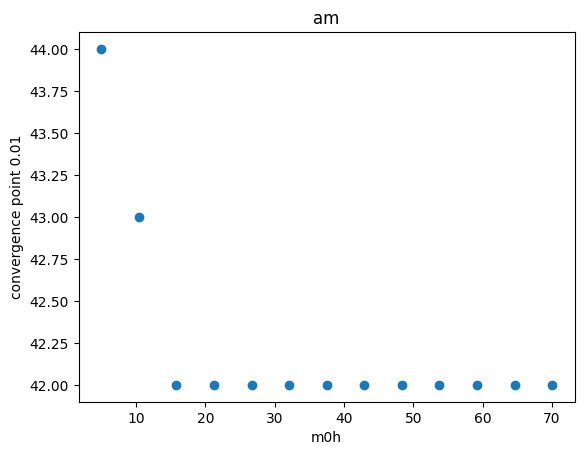

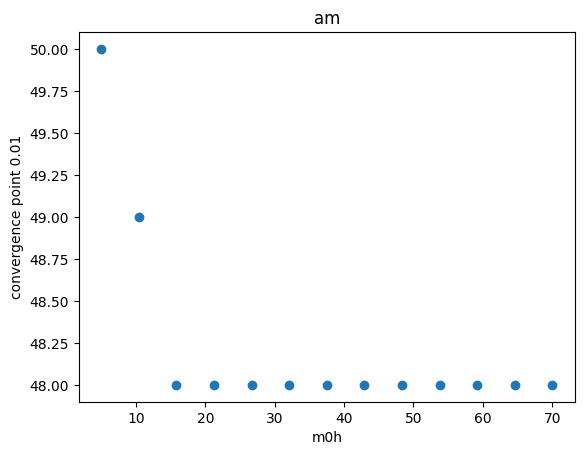

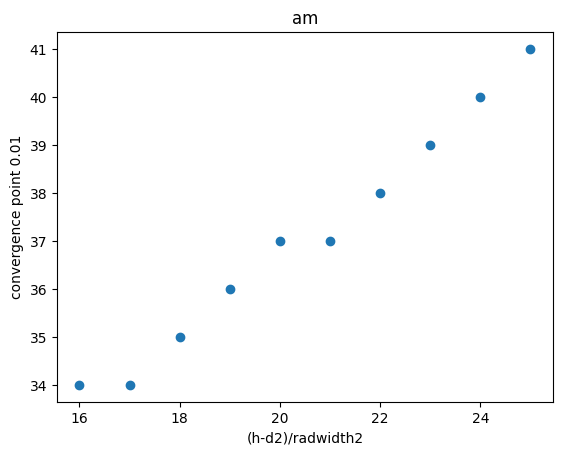

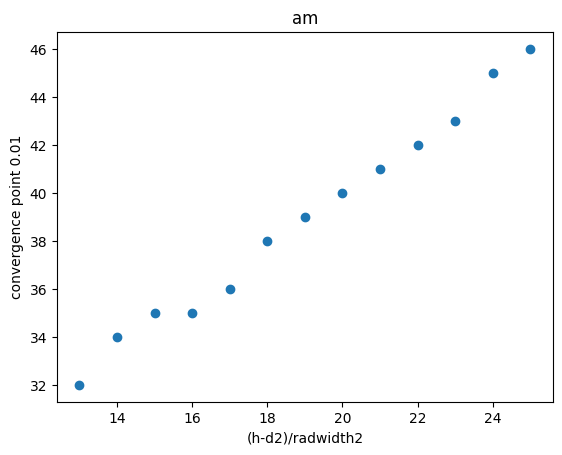

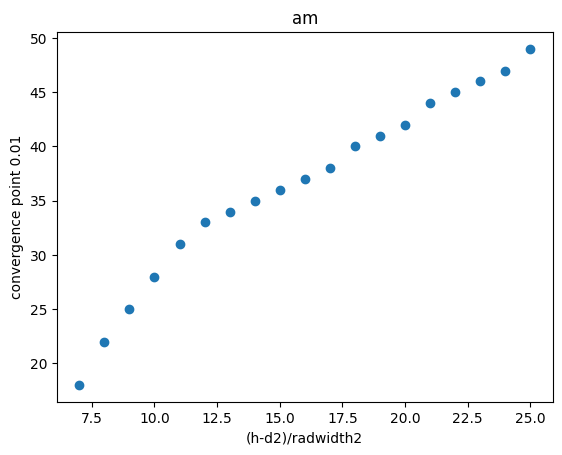

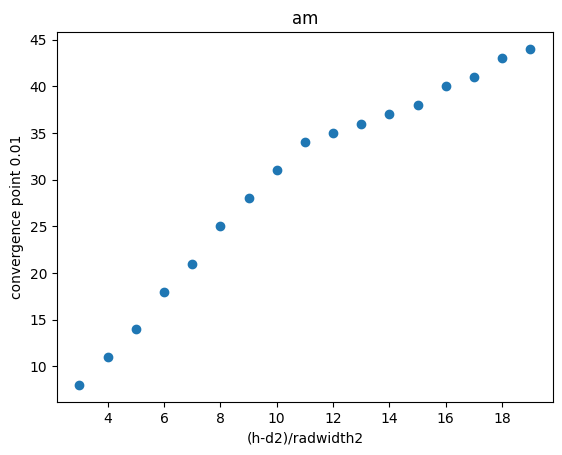

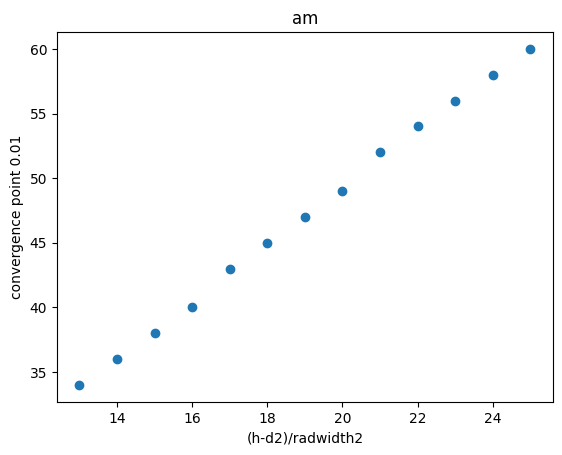

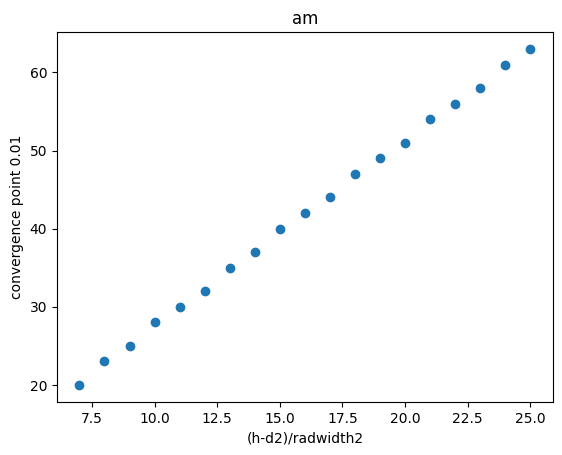

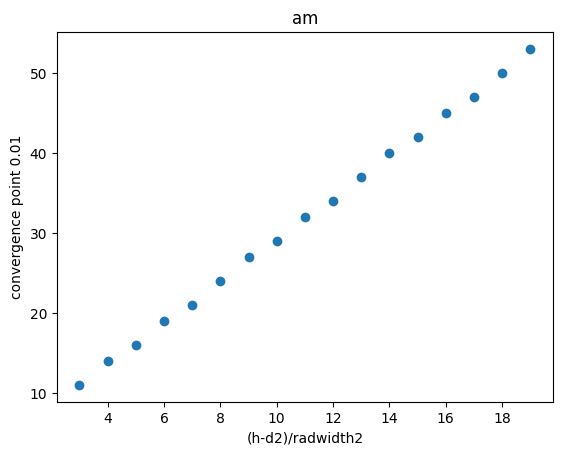

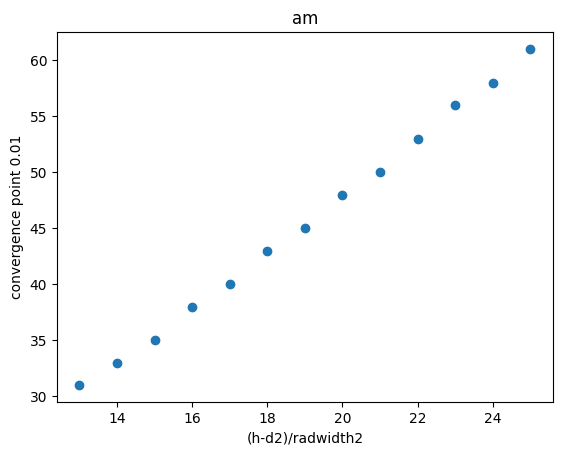

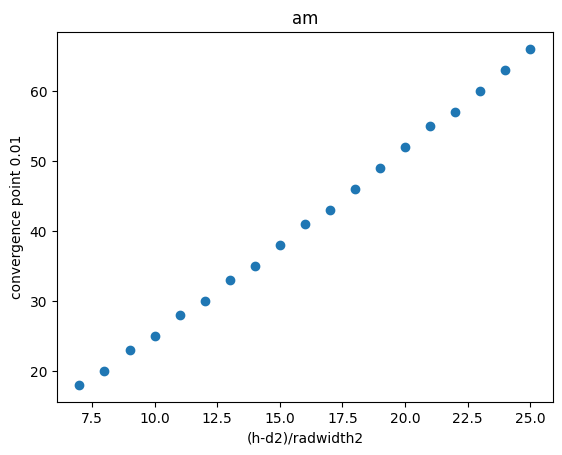

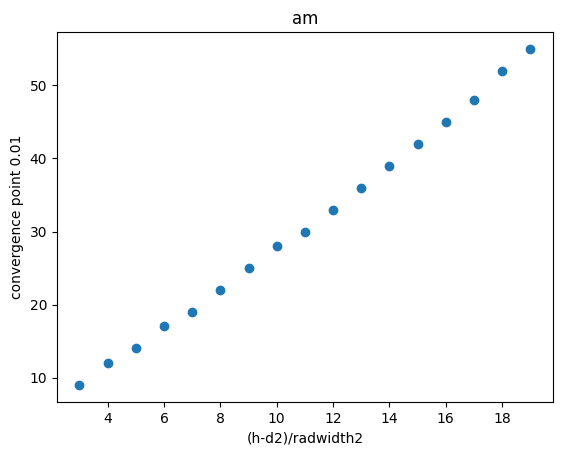

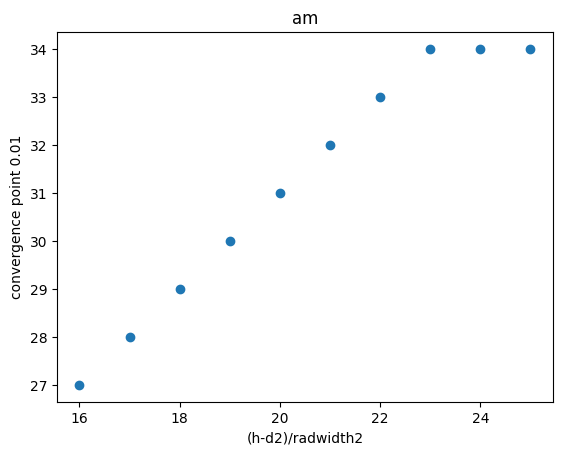

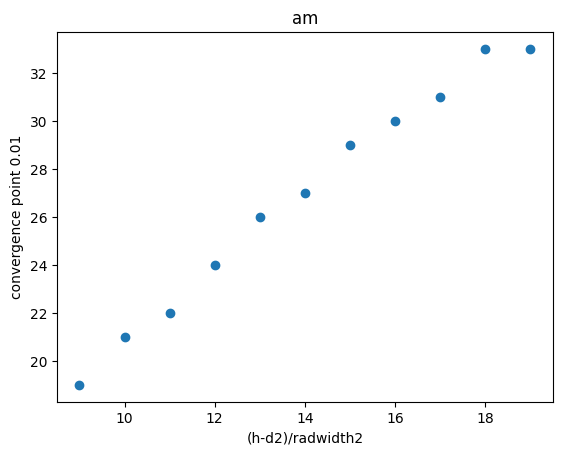

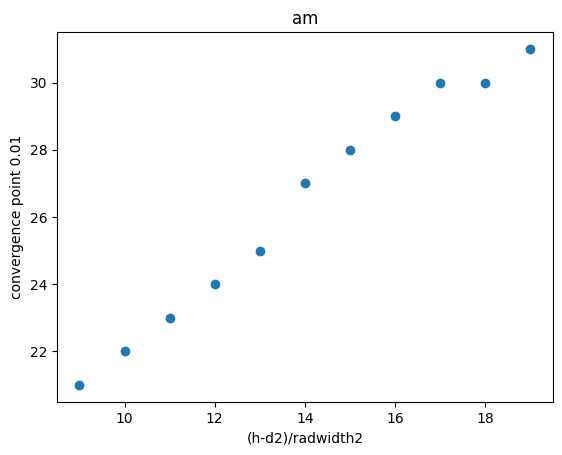

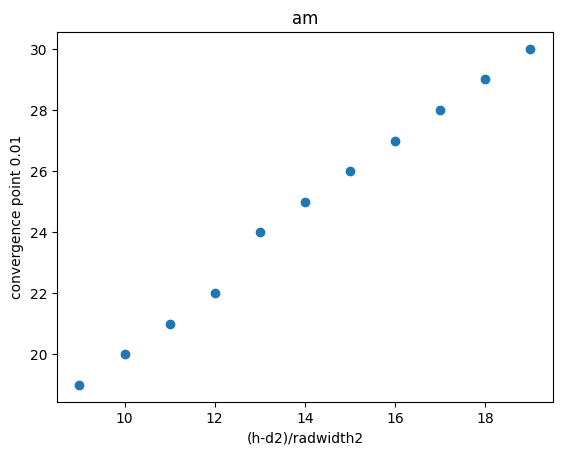

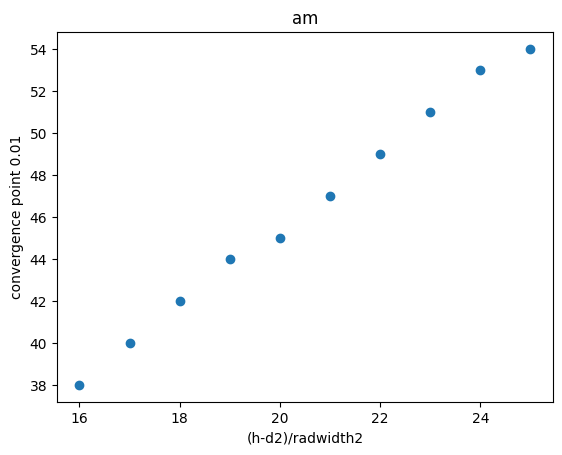

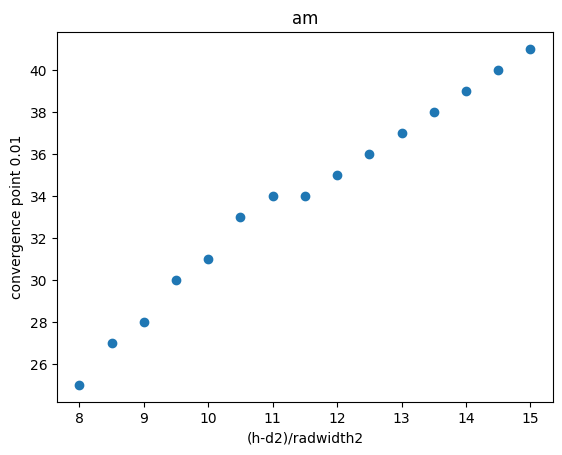

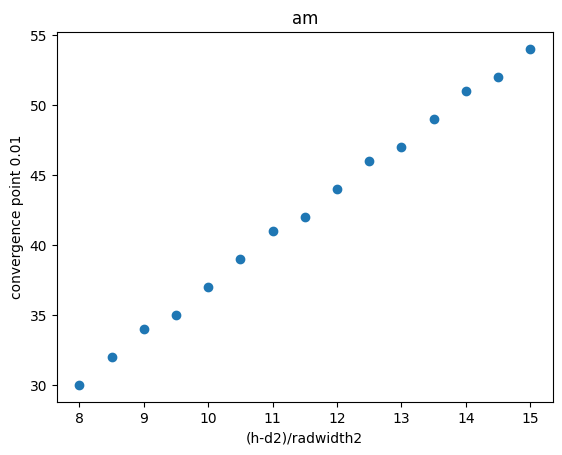

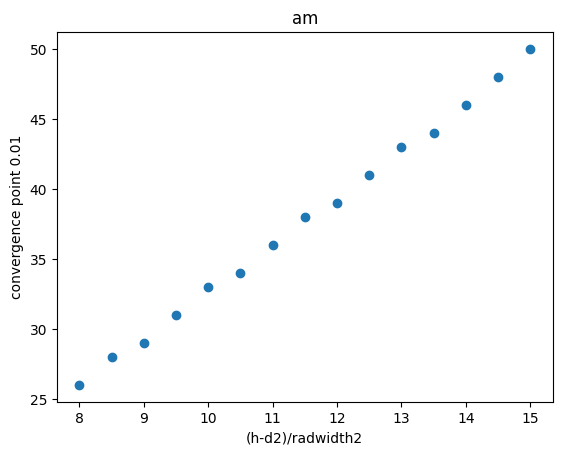

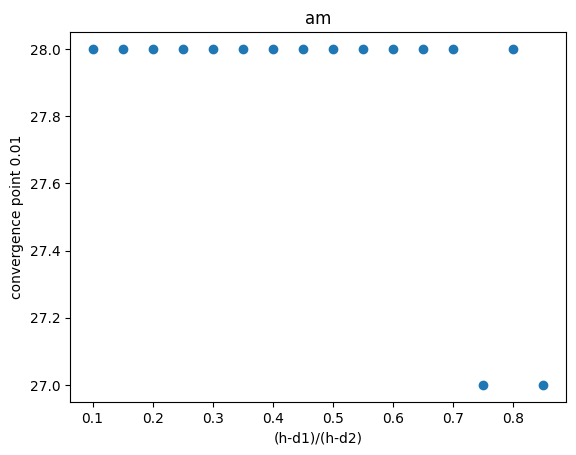

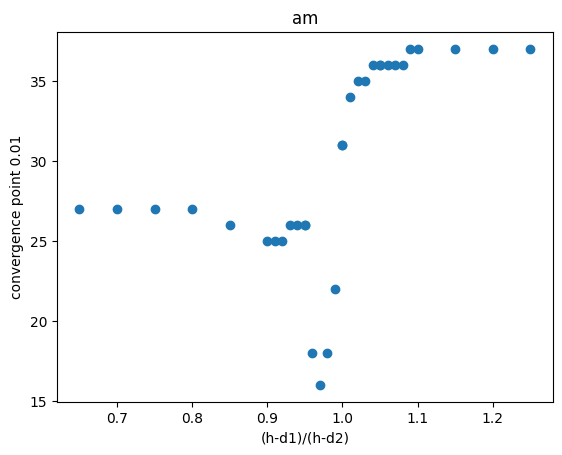

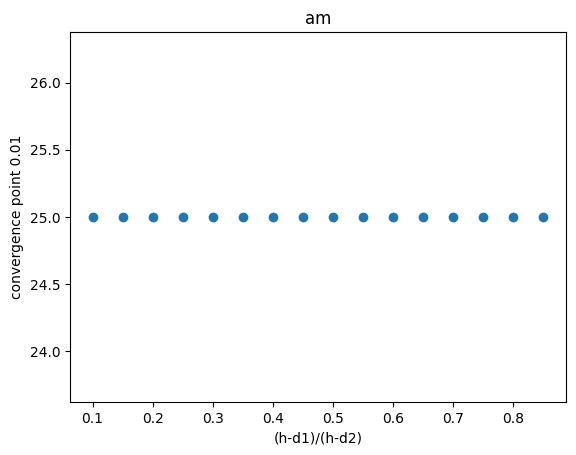

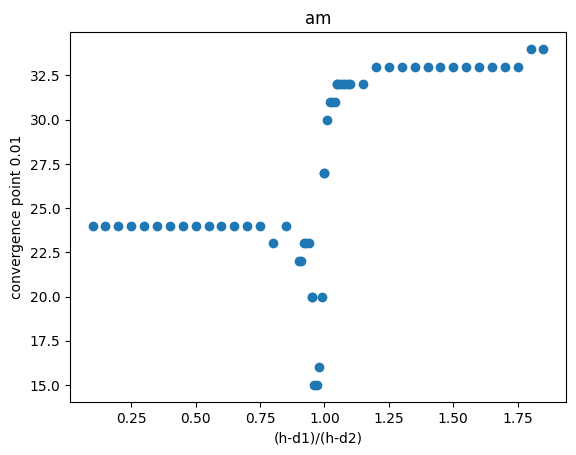

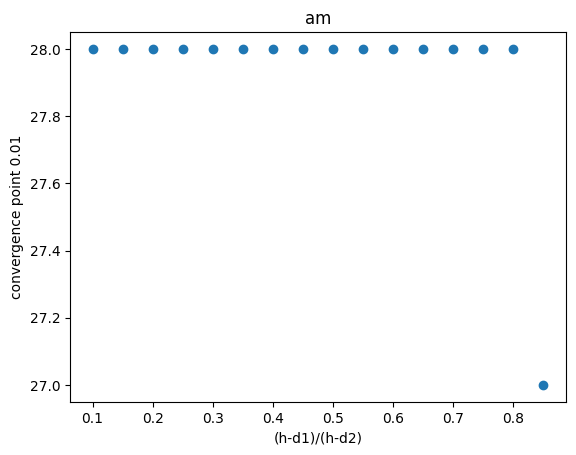

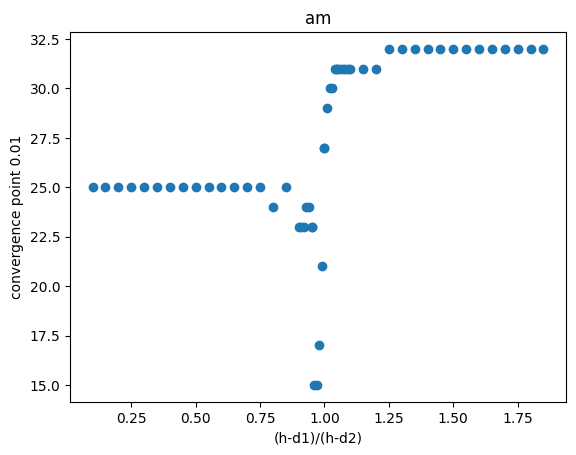

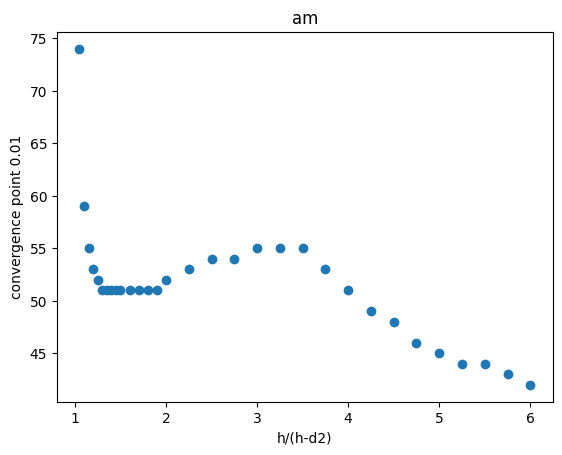

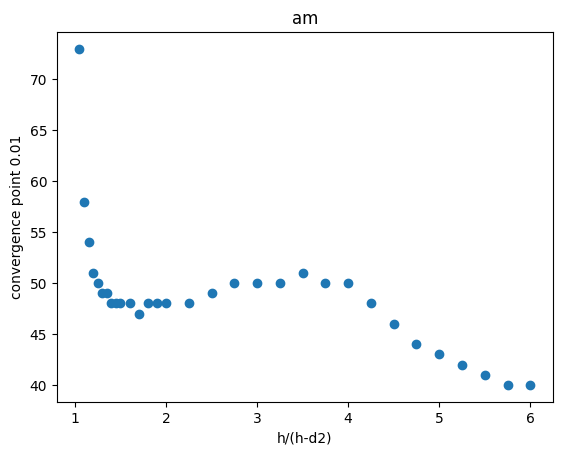

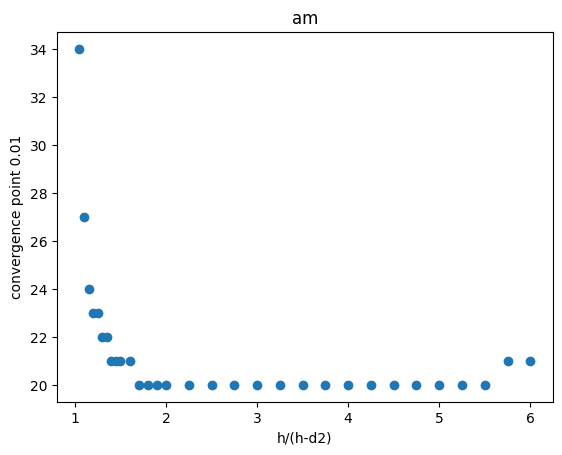

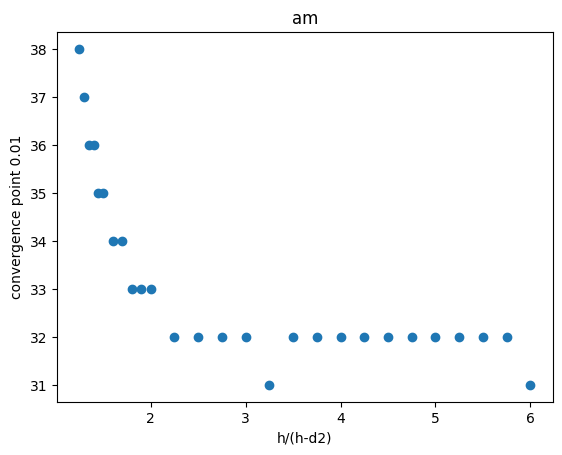

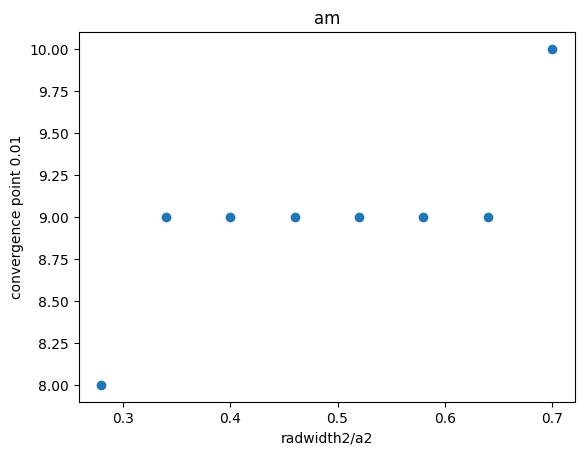

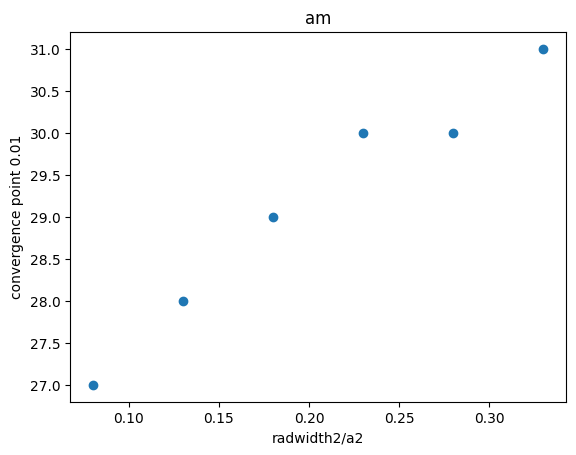

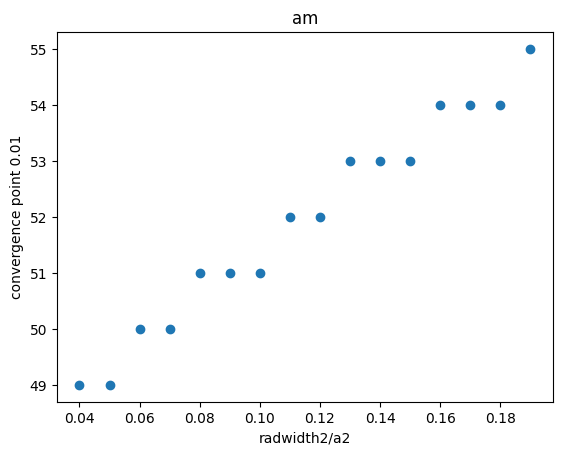

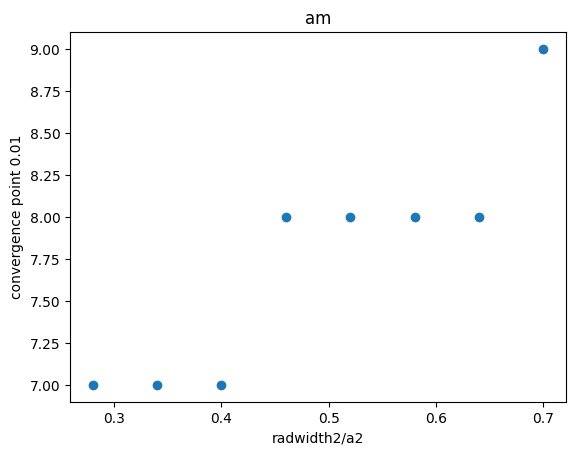

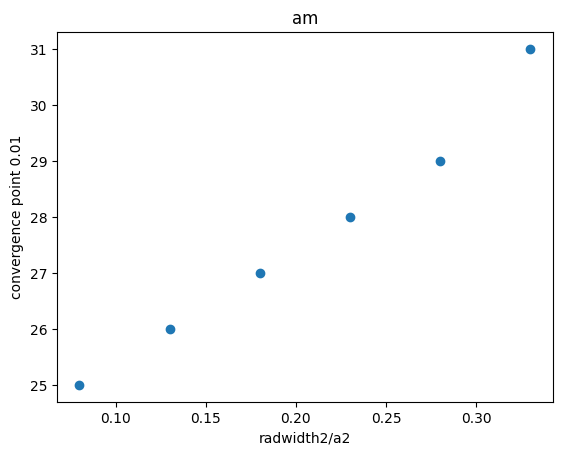

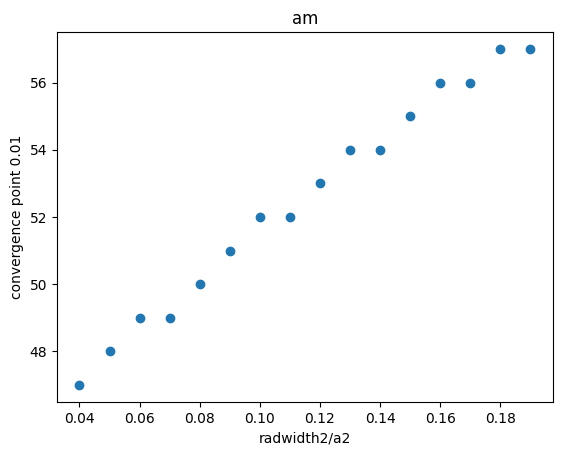

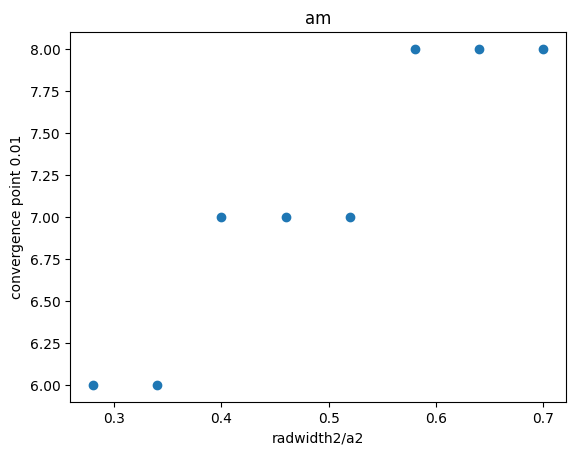

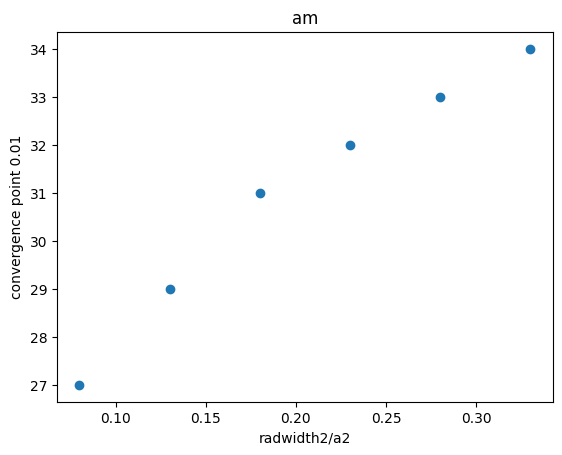

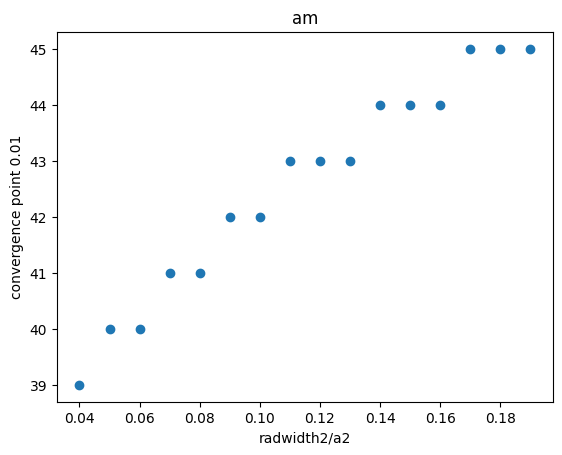

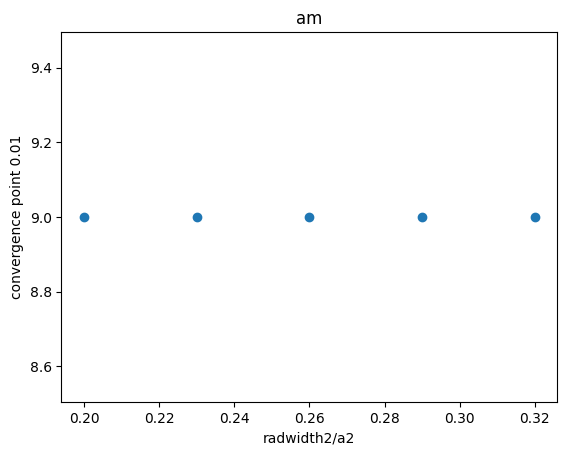

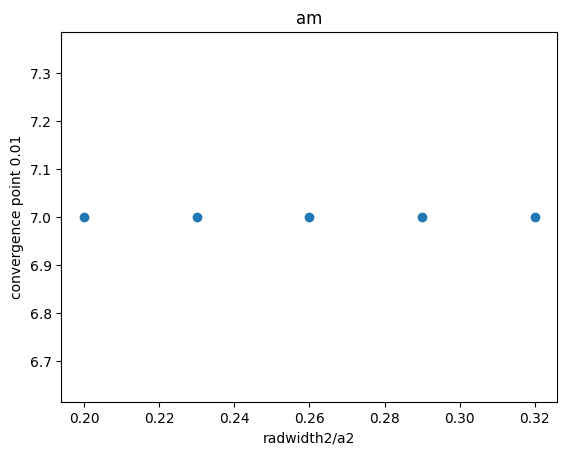

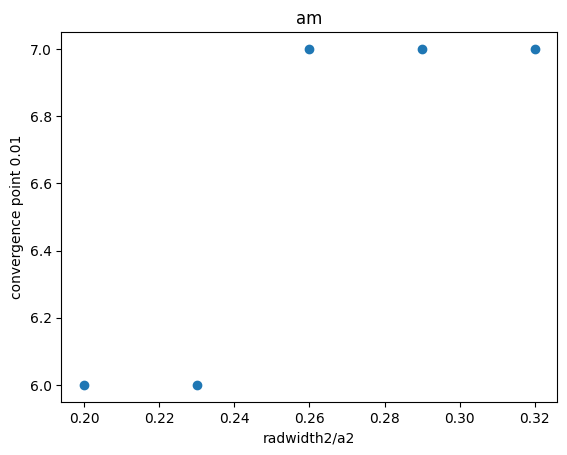

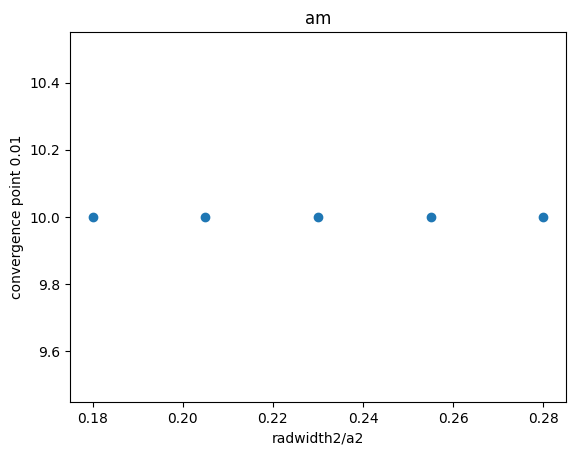

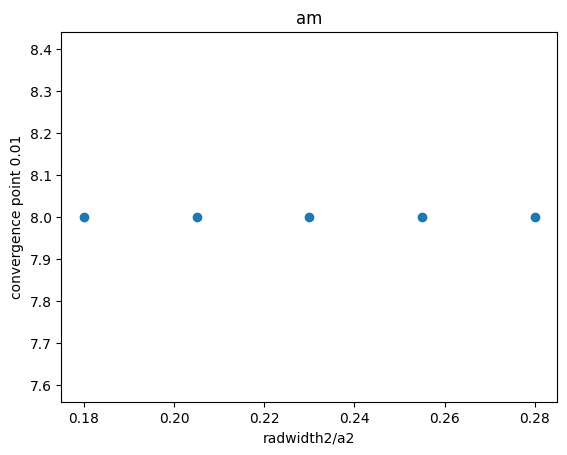

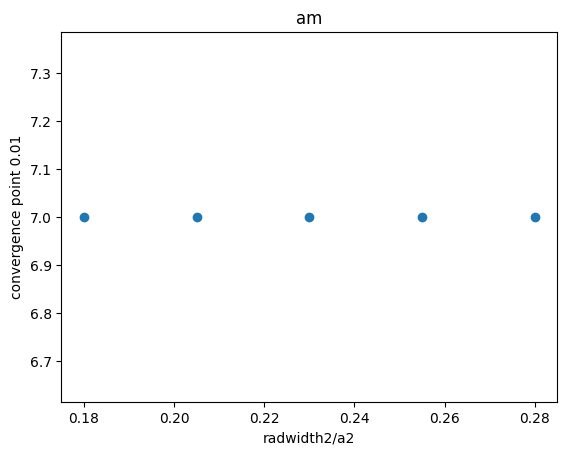

In [26]:
for key in all_data.keys():
  for lst in subdivide_by_constants(all_data[key], key, variable_funcs):
    plot_hydros_against_1(lst, "am", 0.01, variable_funcs[key], xlabel = key, ylabel = None, title = None)